### Chapter 1: Import Library dan Dataset

In [2]:
# import library
import pandas as pd
pd.options.display.max_columns=50

# import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [3]:
# tampilkan jumlah baris dan kolom
df_load.shape

(7113, 22)

In [4]:
# tampilkan 5 data teratas
df_load.head(5)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# jumlah ID yang unik
df_load.customerID.nunique()

7017

### Chapter 2: Memfilter ID Number Pelanggan Format Tertentu

In [6]:
# Mencari format ID Number (Phone Number) Pelanggan 'customerID' yang benar, dengan kriteria:
# 1. panjang karater adalah 11-12
# 2. terdiri dari angka saja
# 3. diawali angka 45 pada 2 digit pertama

# buat kolom baru dengan nama 'valid_id'
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis=1)
print('Hasil jumlah ID Customer yang terfilter adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


In [7]:
# Memfilter Duplikasi ID Number Pelanggan
# 1. duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
# 2. uplikasi dikarenakan inserting beda periode pengambilan data

# drop duplicate rows
df_load.drop_duplicates()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [8]:
# drop duplicate ID sort by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

In [9]:
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya(distinct) adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya(distinct) adalah 6993


### Chapter 3: Mengatasi Missing Values Dengan Penghapusan kolom

In [10]:
# mengecek missing value
print('Total missing values data dari kolom Churn adalah', df_load['Churn'].isnull().sum())

Total missing values data dari kolom Churn adalah 43


In [11]:
# dropping all rows with specific column (Churn)
df_load.dropna(subset=['Churn'], inplace=True)

In [12]:
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah', df_load.shape)

Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


In [13]:
# mengatasi missing value dengan pengisian nilai tertentu
# checking missing value
print('Status Missing Values :', df_load.isnull().values.any())
print('Jumlah Missing Values masing-masing kolom, adalah:')
df_load.isnull().sum().sort_values(ascending=False)

Status Missing Values : True
Jumlah Missing Values masing-masing kolom, adalah:


tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

In [14]:
# Handling missing values 'tenure' fill with 11
df_load['tenure'].fillna(11, inplace=True)

In [15]:
# Handing missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges']):
    median = df_load[col_name].median()

In [16]:
for col_name in list(['TotalCharges']):
    median = df_load[col_name].median()

In [17]:
df_load[col_name].fillna(median, inplace=True)

In [18]:
df_load.isnull().sum().sort_values(ascending=False)

MonthlyCharges      26
UpdatedAt            0
customerID           0
TotalCharges         0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
DeviceProtection     0
OnlineBackup         0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

### Chapter 4: Mengatasi Outlier

In [19]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
print('Persebaran Data sebelum ditangani Outlier:')
df_load_col_point = df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]
df_load_col_point.describe()

Persebaran Data sebelum ditangani Outlier:


,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6924.000000,6950.000000
mean,32.477266,65.766219,2305.083460
std,25.188910,50.551720,2578.651143
min,0.000000,0.000000,19.000000
25%,9.000000,36.087500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.900000,3799.837500
max,500.000000,2311.000000,80000.000000


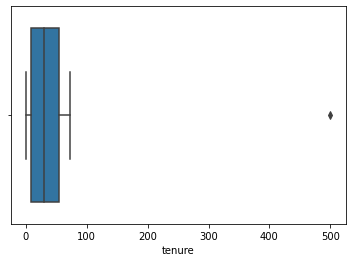

In [21]:
# boxplot tenure
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

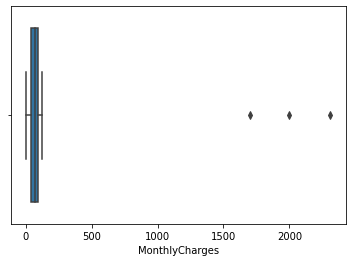

In [22]:
# boxplot MonthlyCharges
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

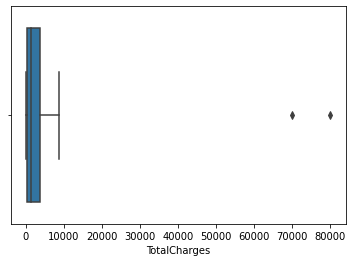

In [23]:
# boxplot TotalCharges
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

In [24]:
# Mengatasi Outlier
# Handling with IQR
Q1 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)

In [25]:
IQR = Q3 - Q1 
maximum = Q3 + (1.5*IQR)
print('Nilai maximum dari masing-masing variable adalah:')
maximum

Nilai maximum dari masing-masing variable adalah:


tenure             124.00000
MonthlyCharges     170.61875
TotalCharges      8889.13125
dtype: float64

In [26]:
minimum = Q1 -(1.5*IQR)
print('Nilai minimum dari masing-masing variable adalah:')
minimum

Nilai minimum dari masing-masing variable adalah:


tenure             -60.00000
MonthlyCharges     -44.63125
TotalCharges     -4682.31875
dtype: float64

In [27]:
more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load= df_load.mask(lower_than, minimum, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_24000\2609117780.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
C:\Users\HP\AppData\Local\Temp\ipykernel_24000\2609117780.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)


In [28]:
print('Persebaran data setelah ditangani outlier:')
df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

Persebaran data setelah ditangani outlier:


,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6924.000000,6950.000000
mean,32.423165,64.972004,2286.058750
std,24.581073,30.087558,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.087500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.900000,3799.837500
max,124.000000,170.618750,8889.131250


### Chapter 5: Mendeteksi Nilai Yang Tidak Standar

In [30]:
# Masukkan variable
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                      'Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('Unique Values Count \033[1m'+'Before Standardized\033[0m Variable', col_name)
    print(df_load[col_name].value_counts())

Unique Values Count Before Standardized Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64
Unique Values Count Before Standardized Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64
Unique Values Count Before Standardized Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64
Unique Values Count Before Standardized Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64
Unique Values Count Before Standardized Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64
Unique Values Count Before Standardized Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64
Unique Values Count Before Standardized Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64
Unique Values Count Before Standardized 

In [31]:
# Menstadarisasi variable kategorik
df_load = df_load.replace(['Wanita', 'Laki-Laki', 'Churn', 'Iya'],['Female', 'Male', 'Yes', 'Yes'])

In [32]:
for col_name in list (['gender', 'Dependents', 'Churn']):
    print('\nUnique Values Count \033[1m'+'After Standardized\033[0m Variable', col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


### Kesimpulan
Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:
- Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
- Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
- Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.

Setelah kita standardkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value-nya.